# Noisy testing track generator

In [1]:
#import libraries
import librosa
import math as ma
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
#change the path to the existing musdb path mixture file.
path = '/mnt/fast0/sp2609/musdb18hq/test/Zeno - Signs/mixture.wav'
sig, sr = librosa.load(path)
sig=np.interp(sig, (sig.min(), sig.max()), (-1, 1))

In [3]:
snr = 10 #noise level in output
rms_sig=ma.sqrt(np.mean(sig**2))
rms_new=ma.sqrt(rms_sig**2/(pow(10,snr/10)))

#std_new=RMS_n
noise=np.random.normal(0, rms_new, sig.shape[0])

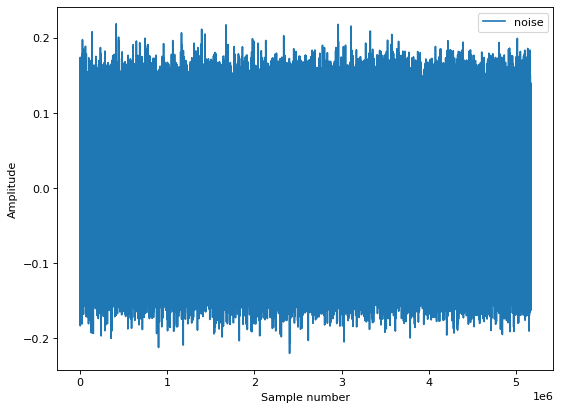

In [4]:
#plot noise
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(noise,label = "noise")
plt.legend()
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.show()

In [5]:
#add noise and ground truth
noisy_signal=sig+noise

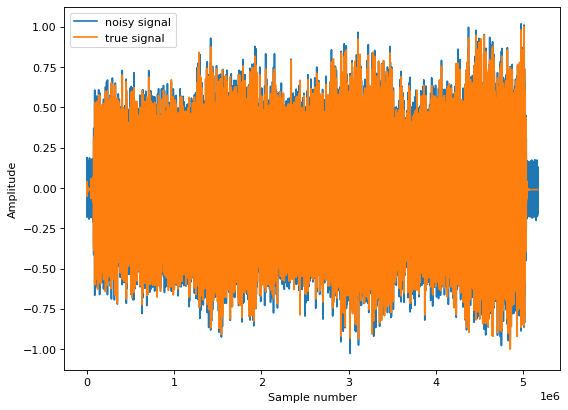

In [6]:

#plots fpr report
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(noisy_signal,label = "noisy signal")
plt.plot(sig,label = "true signal")

plt.legend()
plt.xlabel("Sample number")
plt.ylabel("Amplitude")

plt.show()


In [8]:
path1 = '/mnt/faster0/sp2609/music-source-separation/Zeno - Signs.wav'
from scipy.io.wavfile import write
write(path1,sr,noisy_signal)

In [ ]:
def white_signal_gen(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

In [ ]:
def get_noise_from_sound(signal,noise,SNR):
    RMS_s=math.sqrt(np.mean(signal**2))
    #required RMS of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    
    #current RMS of noise
    RMS_n_current=math.sqrt(np.mean(noise**2))
    noise=noise*(RMS_n/RMS_n_current)
    
    return noise

In [ ]:
def to_polar(complex_ar):
    return np.abs(complex_ar),np.angle(complex_ar)

In [ ]:
path = '/mnt/fast0/sp2609/musdb18hq/test/Zeno - Signs/mixture.wav'


In [ ]:
#**********************************
#*************add AWGN noise******
#**********************************
import math
plt.figure(figsize=(8, 6), dpi=80)
signal_file=path
print("1")
signal, sr = librosa.load(signal_file)
print('2')
signal=np.interp(signal, (signal.min(), signal.max()), (-1, 1))
print('3')
noise=white_signal_gen(signal,SNR=10)
print('4')
if(len(noise)>len(signal)):
    print('hello')
    noise=noise[0:len(signal)]
elif(len(noise)<len(signal)):
    print('error')
    



signal_noise=signal+noise
print('5')

plt.plot(signal_noise,label = "noisy signal")
plt.plot(signal,label = "true signal")

plt.legend()
plt.xlabel("Sample number")
plt.ylabel("Amplitude")

plt.show()


In [ ]:
path1 = '/mnt/faster0/sp2609/music-source-separation/Zeno - Signs.wav'
from scipy.io.wavfile import write
write(path1,sr,signal_noise)

In [ ]:
plt.plot(noise,label = "noise")

plt.legend()
plt.xlabel("Sample number")
plt.ylabel("Amplitude")

plt.show()

In [ ]:
noise